In [4]:
# Удаляем конфликтующие пакеты
!pip uninstall -y grpcio-status ml-dtypes tf-keras tensorflow keras-nlp jax dopamine-rl

# Устанавливаем совместимые версии пакетов
!pip install tensorflow==2.13.0 keras==2.13.0 tf-keras==2.13.0 grpcio-status==1.48.2 ml-dtypes==0.4.0 keras-nlp==0.5.1 jax==0.5.2 dopamine-rl==4.1.2

Found existing installation: grpcio-status 1.71.0
Uninstalling grpcio-status-1.71.0:
  Successfully uninstalled grpcio-status-1.71.0
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras-nlp 0.18.1
Uninstalling keras-nlp-0.18.1:
  Successfully uninstalled keras-nlp-0.18.1
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: dopamine_rl 4.1.2
Uninstalling dopamine_rl-4.1.2:
  Successfully uninstalled dopamine_rl-4.1.2
ERROR: Could not find a version that satisfies the requirement keras==2.13.0 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4,

In [5]:
# Устанавливаем только TensorFlow
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_text-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached tensorflow_text-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached tensorflow_text-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow_text-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.1/527.1 kB 34.7 MB/s eta 0:00:00
  

In [1]:
# Библиотека матричного вычисления
import numpy as np
# Библиотека для работы с данными
import pandas as pd
# Библиотека для работы с регулярными выражениями
import re
# Библиотека для работы с фреймворком TensorFlow
import tensorflow as tf
# Библиотека AutoML autokeras
import autokeras as ak
# Библиотеки для построения графиков и их стилизации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Утилита для расщепления выборки
from sklearn.model_selection import train_test_split

# Необходимые метрики для построения Матрицы ошибок и отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from zipfile import ZipFile

with ZipFile("archive.zip", "r") as myzip:
  myzip.extractall()

In [3]:
data = pd.read_csv('lenta-ru-news.csv')
print(data)

                                                url  \
0        https://lenta.ru/news/1914/09/16/hungarnn/   
1       https://lenta.ru/news/1914/09/16/lermontov/   
2       https://lenta.ru/news/1914/09/17/nesteroff/   
3        https://lenta.ru/news/1914/09/17/bulldogn/   
4            https://lenta.ru/news/1914/09/18/zver/   
...                                             ...   
800970      https://lenta.ru/news/2019/12/14/shnur/   
800971       https://lenta.ru/news/2019/12/14/dolg/   
800972  https://lenta.ru/news/2019/12/14/dark_euro/   
800973      https://lenta.ru/news/2019/12/14/meteo/   
800974      https://lenta.ru/news/2019/12/14/olimp/   

                                                    title  \
0       1914. Русские войска вступили в пределы Венгрии     
1       1914. Празднование столетия М.Ю. Лермонтова от...   
2                                1914. Das ist Nesteroff!   
3                         1914. Бульдог-гонец под Льежем    
4                1914. Под Люблино

<ipython-input-3-b736c4179a12>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lenta-ru-news.csv')


In [4]:
print(set(data['topic']))

{'Экономика', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [5]:
data = data.dropna(axis=0, how='any', inplace=False)

In [6]:
top_nine = pd.Series(data['topic']).value_counts(dropna=False).head(9)
print(top_nine)

topic
Россия             155004
Мир                136620
Экономика           76423
Спорт               57894
Культура            53530
Наука и техника     53136
Бывший СССР         51370
Интернет и СМИ      44421
Из жизни            27513
Name: count, dtype: int64


In [7]:
valid_topics = [
    'Россия',
    'Мир',
    'Экономика',
    'Спорт',
    'Культура',
    'Наука и техника',
    'Бывший СССР',
    'Интернет и СМИ',
    'Из жизни',
    'Путешествия'
]

# Проверяем, содержится ли topic в списке допустимых тем
if data['topic'].isin(valid_topics).any():
    data = {'title': data.title, 'topic': data.topic}

data = pd.DataFrame(data)

In [8]:
print('Найдено дубликатов: ', data.duplicated().sum())

# Удаляем дубликаты
data.drop_duplicates(subset=['title'], inplace = True)

print('Осталось дубликатов после очистки: ', data.duplicated().sum())

Найдено дубликатов:  2404
Осталось дубликатов после очистки:  0


In [9]:
data.head()

,title,topic
0,1914. Русские войска вступили в пределы Венгрии,Библиотека
1,1914. Празднование столетия М.Ю. Лермонтова от...,Библиотека
2,1914. Das ist Nesteroff!,Библиотека
3,1914. Бульдог-гонец под Льежем,Библиотека
4,1914. Под Люблином пойман швабский зверь,Библиотека


In [10]:
X_train, X_tmp, y_train, y_tmp = train_test_split(np.array(data.title[:200]),
                                                  np.array(data.topic[:200]),
                                                  test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_tmp,
                                                  y_tmp,
                                                  test_size=0.5)

print('Форма входных данных: ', X_train.shape)
print('Форма выходных меток: ', y_train.shape)
print('Пример заголовка: ', X_train[0])

Форма входных данных:  (140,)
Форма выходных меток:  (140,)
Пример заголовка:  КНДР переносит свою морскую границу ближе к берегам Южной Кореи


In [ ]:
#чистим память
import gc

tf.keras.backend.clear_session()
gc.collect()

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Ограничение использование памяти до 80%
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    except RuntimeError as e:
        print(e)

In [11]:
# Создание ансамбля моделей (3 наиболее подходящие к данным моделей)
clf = ak.TextClassifier(overwrite=True, max_trials=1, objective='val_accuracy')


# Обучаем модели на 4-х эпохах, размер пакета подбирается автоматически
result_training = clf.fit(X_train, y_train, epochs=4, validation_data=(X_val, y_val), batch_size=2)

Trial 1 Complete [00h 00m 10s]
val_accuracy: 0.6000000238418579

Best val_accuracy So Far: 0.6000000238418579
Total elapsed time: 00h 00m 10s
Epoch 1/4
70/70 [==============================] - 2s 17ms/step - loss: 0.8283 - accuracy: 0.5429 - val_loss: 0.8933 - val_accuracy: 0.3667
Epoch 2/4
70/70 [==============================] - 1s 15ms/step - loss: 0.7968 - accuracy: 0.5357 - val_loss: 0.8858 - val_accuracy: 0.5667
Epoch 3/4
70/70 [==============================] - 1s 15ms/step - loss: 0.6725 - accuracy: 0.7143 - val_loss: 0.8452 - val_accuracy: 0.6000
Epoch 4/4
70/70 [==============================] - 1s 15ms/step - loss: 0.2267 - accuracy: 0.9714 - val_loss: 0.7720 - val_accuracy: 0.6333


In [12]:
# Последовательно экспортируем лучшую модель и выводим ее сводку
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [13]:
def plot_graphs(history, key):
    # Используем библиотеку seaborn для задания стиля и цветовой схемы графика
    sns.set_style('darkgrid')
    palette = sns.color_palette('Set1')

    # Задаем размер полотна для рисования графика
    plt.figure(figsize=(12,6))

    # Отображаем график выбранного параметра
    plt.plot(history.history[key],   # данные для построения графика
             marker='o',             # использовать маркер для точек на графике
             color=palette[2],       # использовать цвет третий в палитре (нумерация с 0)
             linewidth=2.5,          # ширина линии
             label=key)              # подпись легенды

    # График для проверочной выборки
    if 'val_'+key in history.history:
        plt.plot(history.history['val_'+key], # данные для построения графика
                 marker='o',                  # использовать маркер для точек на графике
                 color=palette[4],            # использовать цвет пятый в палитре
                 linewidth=2.5,               # ширина линии
                 label='val_'+key)            # подпись легенды

    # подпись оси Х, размер шрифта - 12
    plt.xlabel("Эпоха", fontsize=12)
    # подпись оси Y, размер шрифта - 12
    plt.ylabel(key, fontsize=12)

    # подпись заголовка графика, размер шрифта - 14
    plt.title('Обучающая и проверочная выборки ('+key.title()+')', fontsize=14)

    # отображение легенды, размер шрифта - 12
    plt.legend(fontsize=12)

    # задаем сетку на графике
    plt.grid(True)

    # отрисовываем полотно со всеми графиками
    plt.show()


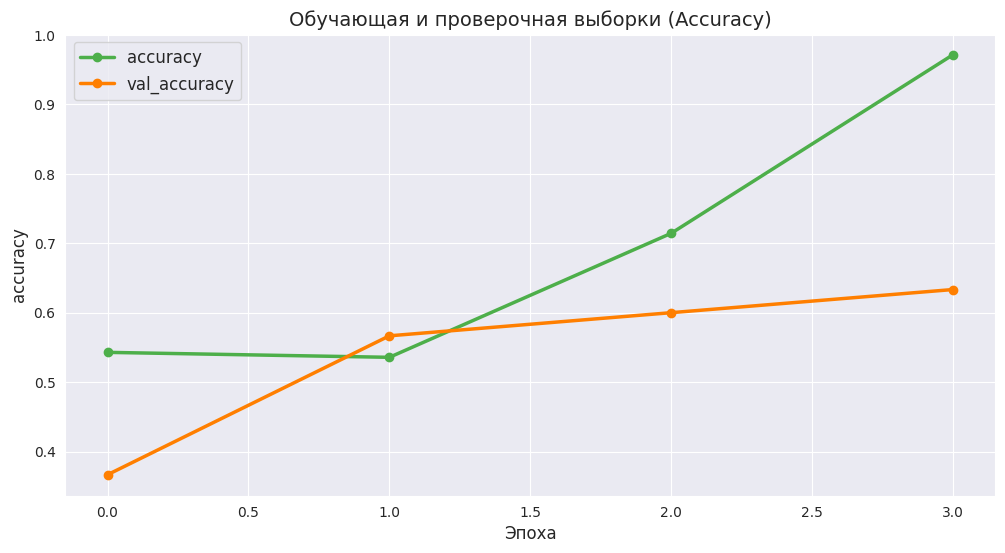

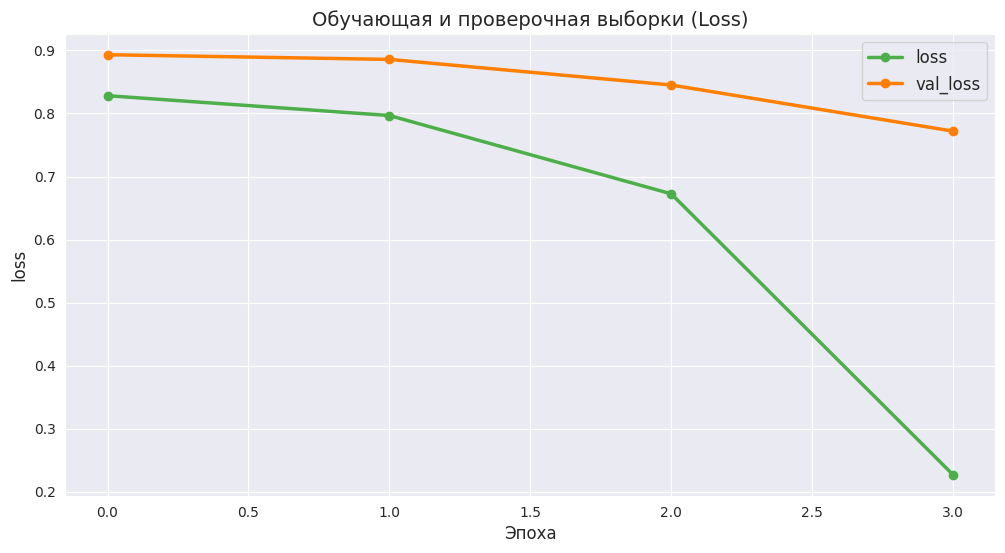

In [14]:
# строим график точности
plot_graphs(result_training, "accuracy")

# строим график потерь
plot_graphs(result_training, "loss")

In [16]:
# Предсказание на лучшей модели
predicted_y = clf.predict(X_test)

# Оценка лучшей модели на тестовых данных
print(clf.evaluate(X_test, y_test))

1/1 [==============================] - 0s 414ms/step - loss: 0.8185 - accuracy: 0.4333
[0.8184916973114014, 0.4333333373069763]


In [17]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         Мир       0.28      0.56      0.37         9
      Россия       0.67      0.38      0.48        21

    accuracy                           0.43        30
   macro avg       0.47      0.47      0.43        30
weighted avg       0.55      0.43      0.45        30

